In [79]:
import tensorflow as tf
from keras.layers import Input,Dense,Dropout
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow_text as text
import tensorflow_hub as hub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
dataset = pd.read_csv(r"C:\Users\aashutosh kumar\Music\spam.csv", encoding='latin1')
dataset.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [13]:
dataset.rename(columns={"v1":"label","v2":"Messages"},inplace=True)
dataset.head(3)

,label,Messages,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [20]:
# dataset.drop(["Unnamed: 2","Unnamed: 3"	,"Unnamed: 4"],axis=1,inplace=True)
dataset.head(3)

,label,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


<Axes: xlabel='label', ylabel='count'>

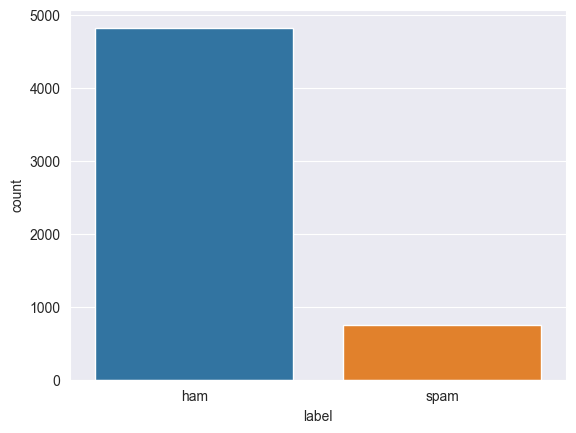

In [26]:
sns.set_style("darkgrid")
sns.countplot(x="label",data=dataset,hue="label")

(-1.0999998321324709,
 1.099999969050372,
 -1.0999999238594997,
 1.099999996374262)

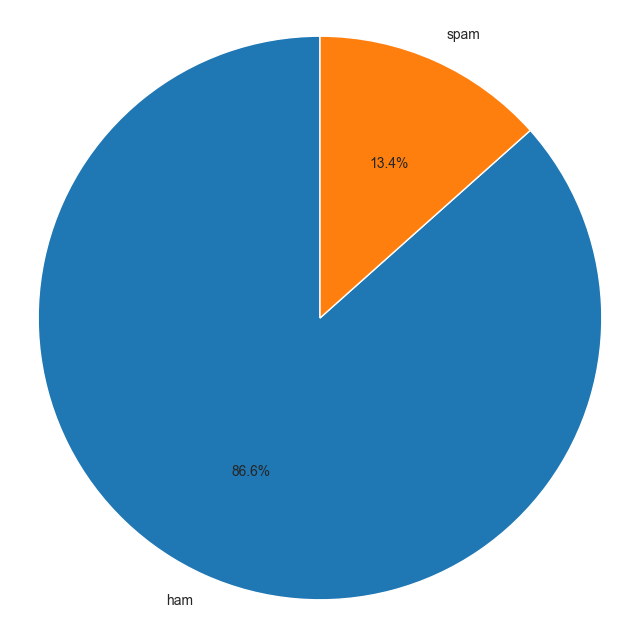

In [34]:
label_counts = dataset['label'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

In [43]:
y = dataset['label'].apply(lambda x: 1 if x == "spam" else 0)
x = dataset["Messages"]

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_test.shape,x_train.shape)

(1115,) (4457,)


In [88]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [55]:
# def| 

text_inputs = Input(shape=(),dtype=tf.string)
processed_text = bert_preprocess(text_inputs)
encoded = bert_encoder(processed_text)["pooled_output"]
output = Dense(units=1,activation="sigmoid")(encoded)

model=Model(inputs=[text_inputs],outputs=[output])

In [57]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_mask': (Non  0           ['input_4[0][0]']                
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [67]:
h=model.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/5
140/140 [==============================] - 85s 608ms/step - loss: 0.2307 - accuracy: 0.9006 - val_loss: 0.2228 - val_accuracy: 0.8780
Epoch 2/5
140/140 [==============================] - 210s 2s/step - loss: 0.1930 - accuracy: 0.9244 - val_loss: 0.1788 - val_accuracy: 0.9265
Epoch 3/5
140/140 [==============================] - 164s 1s/step - loss: 0.1685 - accuracy: 0.9379 - val_loss: 0.1574 - val_accuracy: 0.9435
Epoch 4/5
140/140 [==============================] - 79s 563ms/step - loss: 0.1504 - accuracy: 0.9475 - val_loss: 0.1430 - val_accuracy: 0.9641
Epoch 5/5
140/140 [==============================] - 76s 546ms/step - loss: 0.1374 - accuracy: 0.9569 - val_loss: 0.1302 - val_accuracy: 0.9695


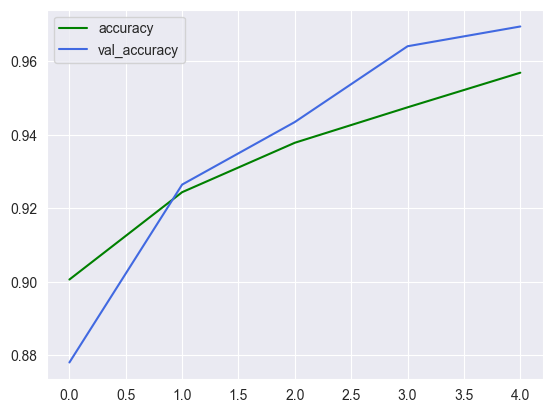

In [69]:
sns.set_style("darkgrid")
plt.plot(h.history["accuracy"],color="green")
plt.plot(h.history["val_accuracy"],color="royalblue")
plt.legend(["accuracy","val_accuracy"])

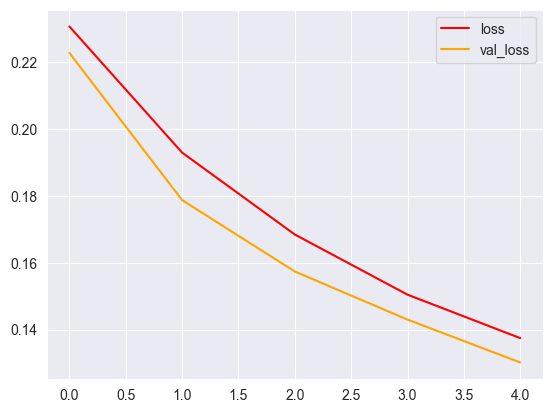

In [71]:
sns.set_style("darkgrid")
plt.plot(h.history["loss"],color="red")
plt.plot(h.history["val_loss"],color="orange")
plt.legend(["loss","val_loss"])

In [73]:
model.evaluate(x_test,y_test)

35/35 [==============================] - 12s 339ms/step - loss: 0.1302 - accuracy: 0.9695


[0.13015279173851013, 0.9695067405700684]

In [82]:
y_predicted = model.predict(x_test)
y_predicted_binary = (y_predicted > 0.5).astype(int)

35/35 [==============================] - 12s 337ms/step


<Axes: >

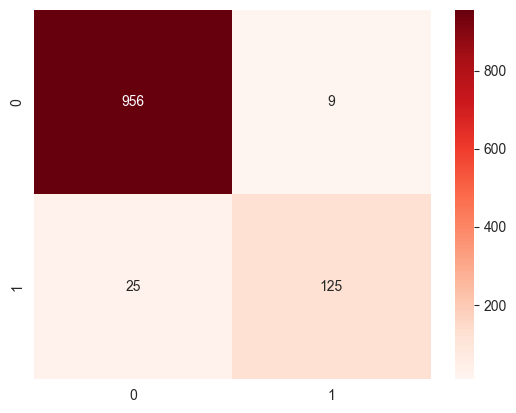

In [86]:
conf_matrix = confusion_matrix(y_test, y_predicted_binary)
sns.heatmap(data=conf_matrix,cmap="Reds",annot=True,fmt="d")

In [81]:
print("Classification Report:")
print(classification_report(y_test, y_predicted_binary))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       965
           1       0.93      0.83      0.88       150

    accuracy                           0.97      1115
   macro avg       0.95      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115

